## Group Members
- Felix Mandyme 577922
- Dylan Cheballah 577424
- Hatlane Lowane 577413
- Sibabalwe Lwazi Phakathi 577973
- Vuyo Fortune Mathe 578376
- Ferdinando Storm Speranza 577252

[Visit Project GitHub](https://github.com/Felix-Red/Project2Group-K.git)

## King County House Price Prediction

# Problem statement
King County, located in Washington, USA, has a real estate market that's pretty stable, with steady demand. But understanding it can be tricky. As a result a reliable system for predicting property prices is required. Such a system will provide stakeholders with precise estimates, allowing for informed decision-making in the face of fluctuating economic conditions and changing buyer preferences. The primary stakeholders in this scenario are real estate agencies, property investors, homeowners, and potential investors, who all stand to benefit from the model's predictions through investment decisions and contextual advice.The Real Estate Price Prediction project aims to use a variety of factors such as location data, property attributes, nature of the market, and other economic indicators. 

## Project objectives
- Accuracy: Develop an accurate and precise predictive model to provide beneficial insights to stakeholders.
- User friendly: The model should have an easy-to-understand interface, allowing stakeholders to engage with the model effortlessly and acquire the required data and information.
- Scalability: The model should eventually handle larger datasets while providing the same accuracy and results, meeting any new requirements.

## Constraints
- Data Privacy Compliance: The predictive model or algorithm must adhere to all data privacy laws and regulations to ensure the safety of private user data and information.
- Complexity of Feature Engineering: Understanding and correctly managing the feature engineering of the predictive model when dealing with unique and different datasets while maintaining performance and efficiency.

# Dataset
The dataset contains house sale prices for King County  It includes homes sold between May 2014 and May 2015. It consists of 21597 rows and 21 columns

## Dataset features
- id: Unique ID for each home sold
- date: Date of home sold
- price: Price of the home sold
- bedrooms: Number of bedrooms in the home
- bathrooms: Number of bathrooms in the home
- sqft_living: Square foot of the house's interior
- sqft_lot: Square foot of the land
- floors: Number of floors the house has
- waterfront: A dummy variable indicating if the house is overlooking the waterfront or not
- view: An index from 0-4 of how good the view from the property is
- condition: An index from 1-5 of the condition of the property
- grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above: Square foot of property above ground level
- sqft_basement: Square foot of the basement below ground level
- yr_build: The year the house was built
- yr_renovated: The year the property was renovated
- zipcode: Zipcode area of the property
- lat: Latitude of the house
- lon: Longitude of the house
- sqft_living15: Square foot of the house for the nearest 15 neighbours
- sqft_lot15: Square foot of the land space for the nearest 15 neighbours

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


import datetime

In [2]:
house_df = pd.read_csv('C:/Users/felix/Desktop/Project2Group-K/Data/kc_house_data.csv')

In [3]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

Preparing the dataset is critical to making highly accurate predictions. The dataset serves as the foundation for our prediction model. By meticulously filtering and cleaning the data, we ensure that it correctly reflects the real-world factors that influence property values. This involves removing any inconsistencies such as null values, or outliers that can affect our results. Furthermore, adequate data preparation enables us to identify the key features that influence property values, such as location, property attributes, market trends, and economic indicators. With a well-prepared dataset, our prediction model may learn from previous patterns and relationships in the data, allowing it to produce more accurate projections for future scenarios. In

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

By using the isnull() function, we can ensure that the dataset has no null values. This discovery is critical for the overall system's reliability and precision. Null values, which reflect missing or incomplete data, can cause major distortions in the analysis and prediction process. Their absence assures that each data point is complete and genuine, allowing our prediction model to extract insights from all accessible information. With a clean dataset free of null values, we can be confident that our model's predictions are based on comprehensive and accurate data, increasing its usefulness in delivering useful predictions for the real estate market.


In [6]:
house_df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
#Conversion to datetime
house_df['date'] = pd.to_datetime(house_df['date'], format='%m/%d/%Y')
house_df['yr_built'] = pd.to_datetime(house_df['yr_built']).dt.strftime('%Y')
house_df['yr_renovated'] = pd.to_datetime(house_df['yr_renovated']).dt.strftime('%Y')

In [14]:
house_df['month'] = house_df['date'].apply(lambda date:date.month)
house_df['year'] = house_df['date'].apply(lambda date:date.year)



In [8]:
# dropping id and zip code columns 
house_df = house_df.drop('id', axis=1).drop('zipcode', axis=1).drop('date', axis=1)

# Exploratory Data Analysis

Our system relies heavily on data visualization for exploratory analysis. It is an effective tool for learning and interpreting complex datasets since it presents information in a straightforward and understandable visual style. We may identify patterns, trends, and relationships in data using visualizations such as charts, graphs, and maps that raw statistics alone cannot reveal. This visual perspective allows us to acquire a better knowledge of the real estate market's underlying dynamics, such as the spatial distribution of property prices, temporal trends, and correlations between variables. 

#### Target Variable: Price feature

<Axes: xlabel='price', ylabel='Count'>

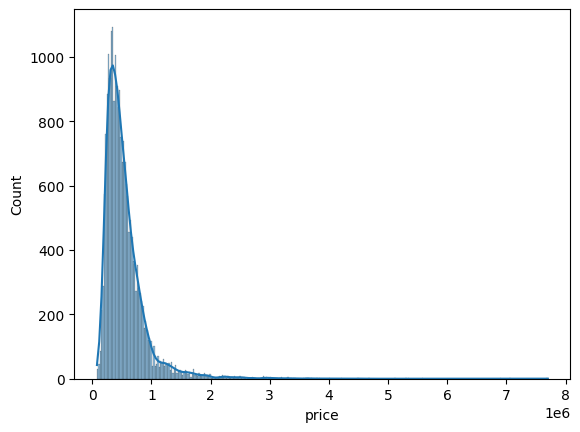

In [9]:
sns.histplot(house_df['price'], kde=True)

From the distribution we can see that mamy of the properties bought are in the range between $100 000 and $1 000 000. There are some properties that go above 4 million the highest being $7 700 000. However, we will take houses between $700 000 and $100 000 because we see that there are a significant amount of houses sold in that range.

<Axes: xlabel='sqft_living'>

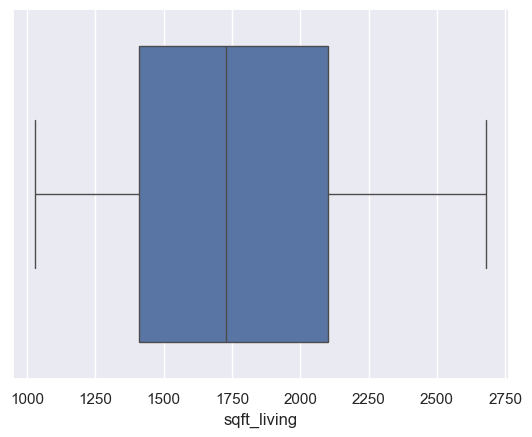

In [10]:
mask_price = house_df['price'] < 700_000
df = house_df[mask_price]

low, high = df['sqft_living'].quantile([0.1,0.9])
mask_living = df['sqft_living'].between(low,high)
house_df1 = df[mask_living]

sns.set(style='darkgrid')
sns.boxplot(house_df1, x='sqft_living')

<Axes: xlabel='sqft_lot'>

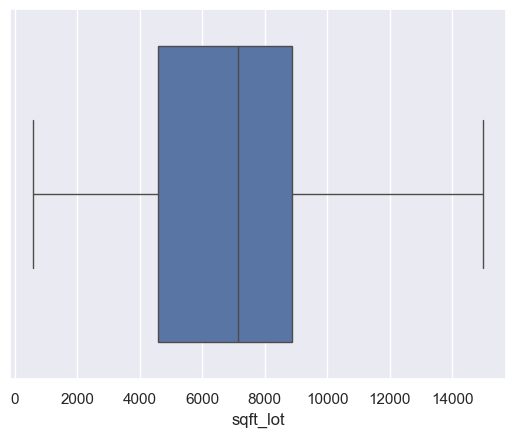

In [11]:
low, high = house_df1['sqft_lot'].quantile([0.0,0.89])
mask_lot = house_df1['sqft_lot'].between(low,high)
house_df2 = house_df1[mask_lot]

sns.set(style='darkgrid')
sns.boxplot(house_df2, x='sqft_lot')

<Axes: xlabel='floors'>

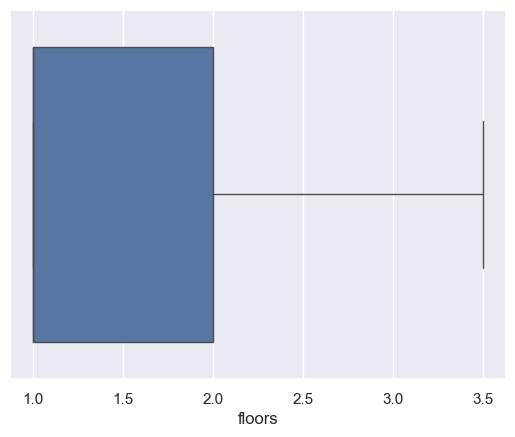

In [12]:
low, high = house_df2['floors'].quantile([0.0,1.0])
mask_lot = house_df2['floors'].between(low,high)
house_df3 = house_df2[mask_lot]

sns.set(style='darkgrid')
sns.boxplot(house_df3, x='floors')

<Axes: xlabel='grade'>

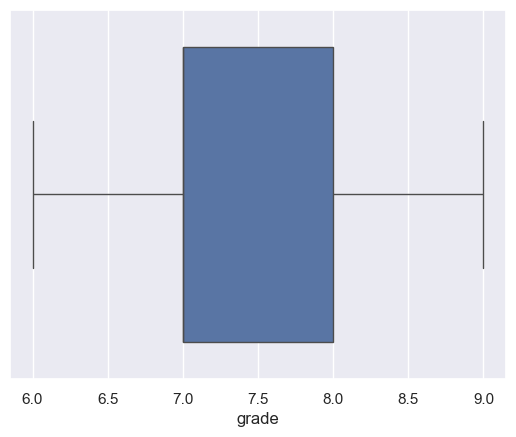

In [13]:
low, high = house_df3['grade'].quantile([0.01,0.99])
mask_gr = house_df3['grade'].between(low,high)
house_df4 = house_df3[mask_gr]

sns.set(style='darkgrid')
sns.boxplot(house_df4, x='grade')

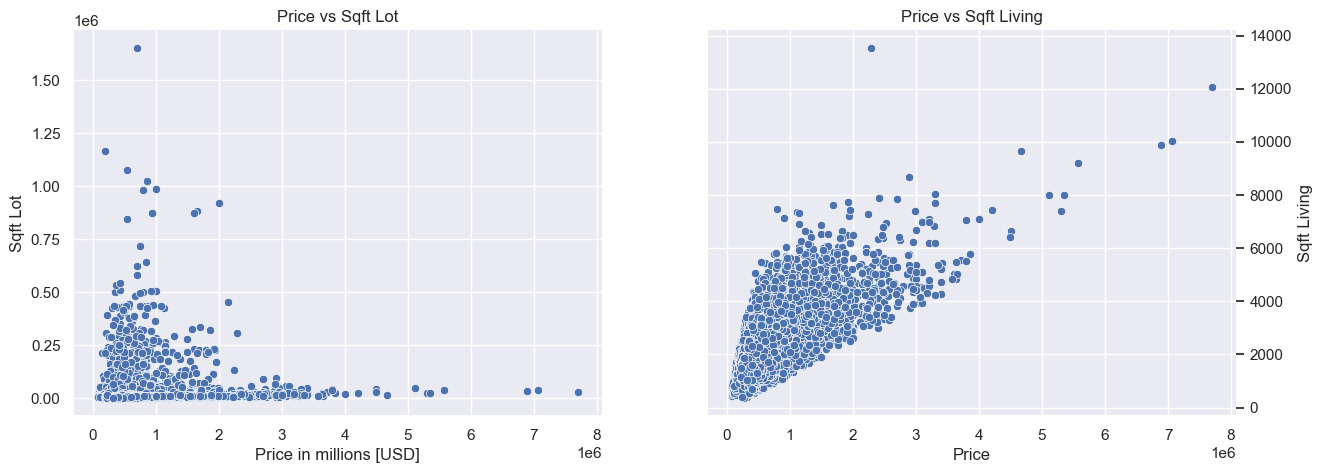

In [14]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(house_df, x='price',y='sqft_lot', ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=house_df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='Sqft Lot', title='Price vs Sqft Lot')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

#### Floor and Bedroom Box Plots

Outliers are identified and evaluated using Outlier Boxplots. The outlier boxplot revealed that the data has several outliers for the target variable, Price. However, the outliers variable correlated to outliers in the number of bedrooms, bathrooms, and square feet of living space.

[Text(0.5, 0, 'Nr of Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

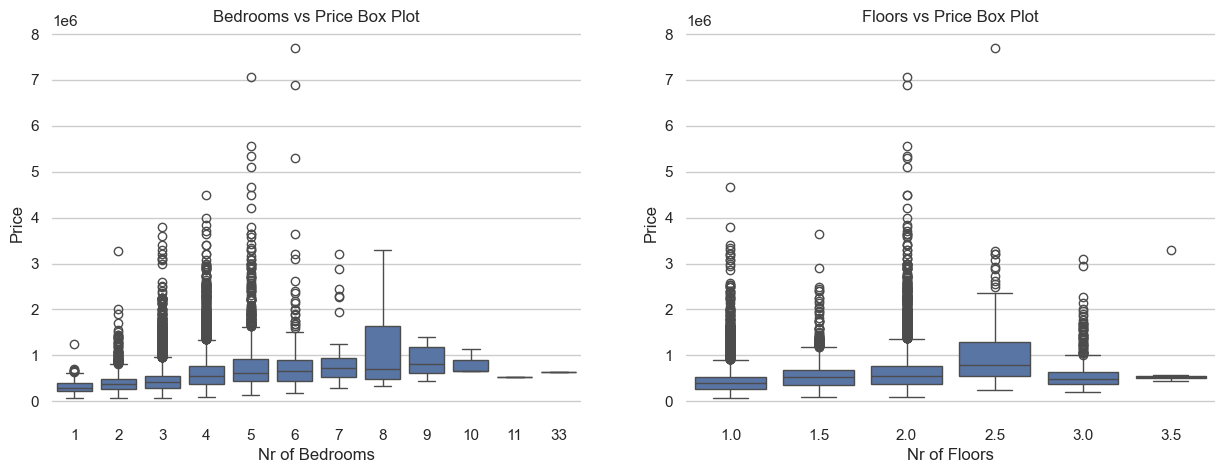

In [15]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house_df['bedrooms'],y=house_df['price'], ax=axes[0])
sns.boxplot(x=house_df['floors'],y=house_df['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Nr of Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Nr of Floors', ylabel='Price', title='Floors vs Price Box Plot')

#### Waterfront, View, and grade box plots

- Watefront houses seems to have higher prices than houses without waterfronts.
- We can see that houses without waterfronts are more concentrated that waterfront houses.
- It seems as if there is a slight increase in the price of the house from an increase in view but not significant. 
- For the grade feature the box plot indecate a clear increase in price as the grade of the houses increase.

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

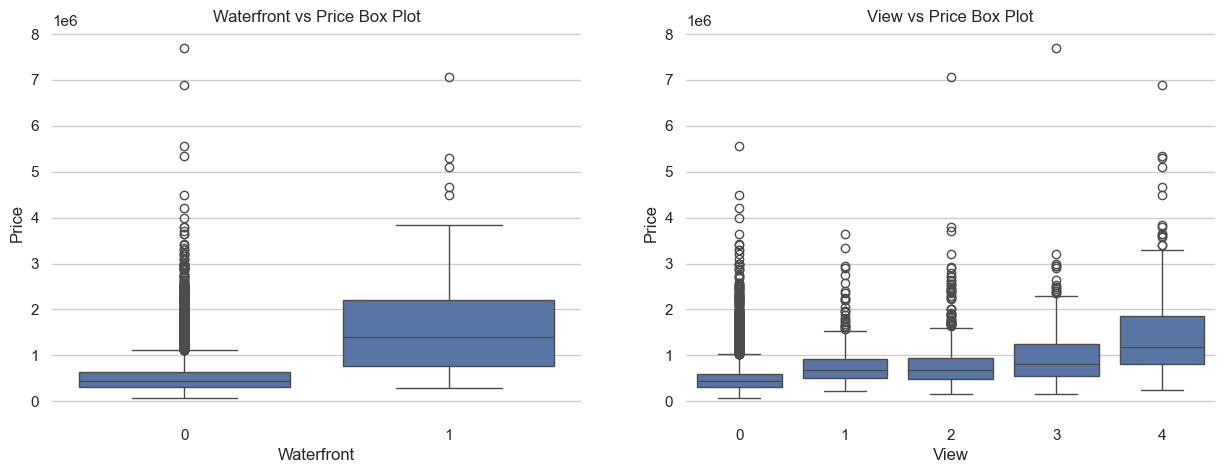

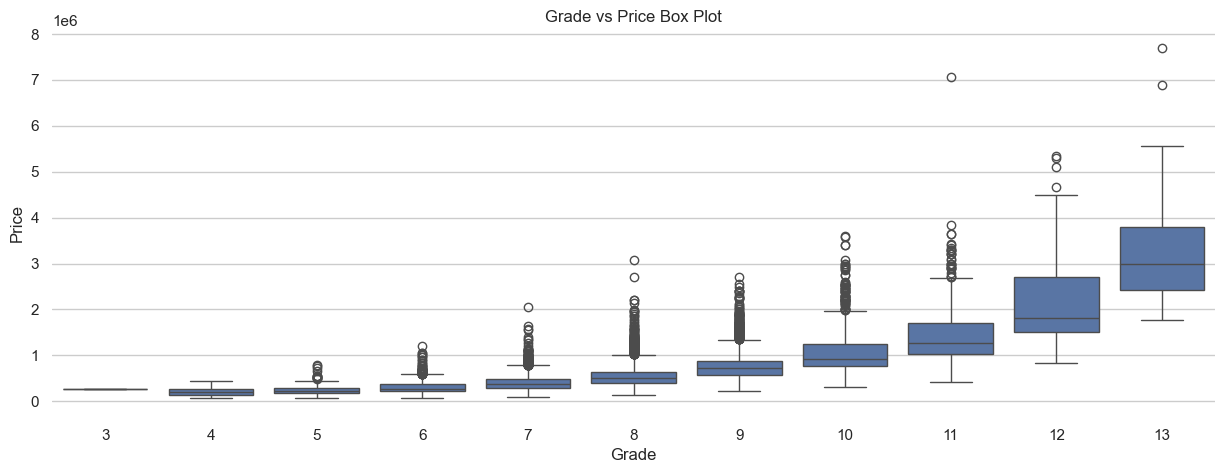

In [16]:
d, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house_df['waterfront'],y=house_df['price'], ax=axes[0])
sns.boxplot(x=house_df['view'],y=house_df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

d, axes = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=house_df['grade'],y=house_df['price'], ax=axes)
sns.despine(left=True, bottom=True)
axes.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

- There are very slight but not significant effects of the year the house was sold, however there is a larger concentration of houses sold in 2014 than in 2015.
- Again there seems to be insignificant effects on the price of the house on the price vs month box plot.
- The line graph shows the fluctuations of house prices over 12 months and we can observe that the price of houses are the highes in the fourth month and decrease toward the end of the year. The lowest being the first month of the year.

ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

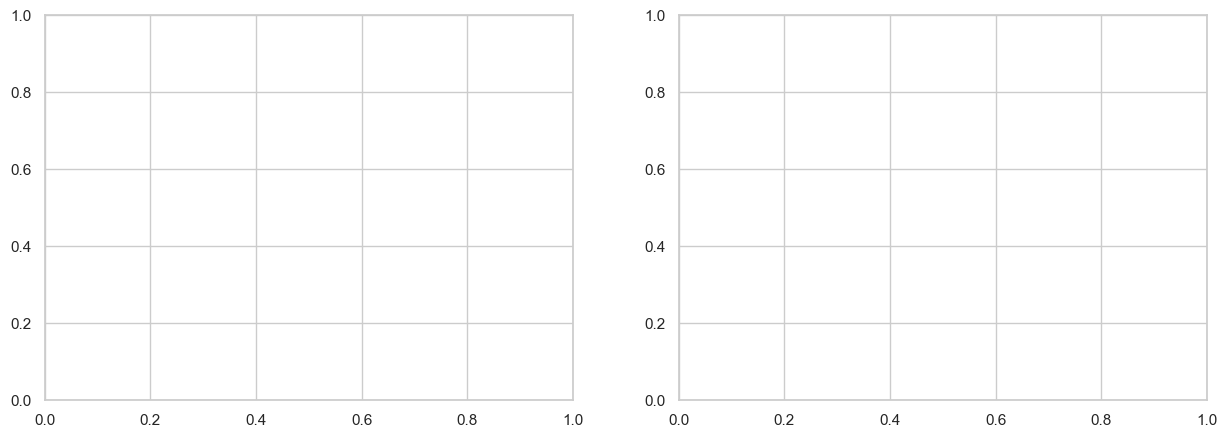

In [18]:
d, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=house_df, ax=axes[0])
sns.boxplot(x='month',y='price',data=house_df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

d, axe = plt.subplots(1, 1,figsize=(15,5))
house_df.groupby(['month']).mean(numeric_only=True)['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')


In [19]:
house_df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12184 entries, 0 to 21595
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          12184 non-null  float64
 1   bedrooms       12184 non-null  int64  
 2   bathrooms      12184 non-null  float64
 3   sqft_living    12184 non-null  int64  
 4   sqft_lot       12184 non-null  int64  
 5   floors         12184 non-null  float64
 6   waterfront     12184 non-null  int64  
 7   view           12184 non-null  int64  
 8   condition      12184 non-null  int64  
 9   grade          12184 non-null  int64  
 10  sqft_above     12184 non-null  int64  
 11  sqft_basement  12184 non-null  int64  
 12  yr_built       12184 non-null  object 
 13  yr_renovated   12184 non-null  object 
 14  lat            12184 non-null  float64
 15  long           12184 non-null  float64
 16  sqft_living15  12184 non-null  int64  
 17  sqft_lot15     12184 non-null  int64  
dtypes: float64(

### Feature Engineering

Feature engineering is critical in data preprocessing, allowing models to perform better and predict more accurately. The offered code snippet demonstrates feature engineering by removing redundant or less informative characteristics such as'sqft_living15','sqft_lot15', 'yr_built', 'yr_renovated','month', 'year','sqft_above', and'sqft_basement'. Furthermore, the addition of a new feature, 'NumberofRooms', which combines 'bedrooms' and 'bathrooms', improves the dataset's descriptive power. This approach improves the dataset for machine learning algorithms by identifying important patterns and relationships that considerably improve the model's prediction capability. Feature engineering fundamentally transforms raw data into a more useful representation, allowing for greater insights and decision-making in data analysis and model development.


# Leaky features

It is crucial to drop leaky features from the dataset to prevent the introduction of bias and inaccuracies into the predictive model. Leaky features are variables that contain information from the future or are directly derived from the target variable, thus providing the model with unintended access to information that it would not have in a real-world scenario. Including such features can lead to inflated model performance metrics during training but may result in poor generalization and unreliable predictions on new data.

In [20]:
house_df4.drop(columns=['sqft_living15','sqft_lot15','yr_built','yr_renovated','month','year','sqft_above','sqft_basement'], inplace=True)
house_df4['NumberofRooms'] = house_df4['bedrooms'] + house_df4['bathrooms']

house_df4.head()
house_df4.to_csv('C:/Users/felix/Desktop/Project2Group-K/Data/clean_df.csv')

KeyError: "['month', 'year'] not found in axis"

In [31]:
house_df4.to_csv('C:/Users/felix/Desktop/Project2Group-K/Data/clean_df.csv')

### Model

In [27]:
X = house_df4.drop('price',axis=1)


# Label
y = house_df4['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_test.to_csv('C:/Users/felix/Desktop/Project2Group-K/Data/test.csv')

Random Forest is an excellent choice for our dataset because of its adaptability and stable performance with complex data structures. Our dataset, which most likely includes multiple factors impacting real estate values, benefits from Random Forest's capacity to handle both numerical and categorical data without requiring considerable preparation. Furthermore, its ensemble nature, which combines many decision trees, reduces overfitting while increasing generalization, which is critical for capturing the intricate linkages in the real estate market. Furthermore, Random Forest automatically generates feature importance rankings, allowing us to discover the most influential predictors influencing property prices in King County. This transparency improves model interpretation and educates stakeholders about the key aspects influencing market dynamics. Overall, Random Forest provides an effective framework for accurate prediction in our dataset. 


In [33]:

forest = RandomForestRegressor()
forest.fit(X_train,y_train)
forest.score(X_test,y_test)


0.8053219382254577

In [34]:

#Grid Search with cross validation to improve the accuracy


forest= RandomForestRegressor()
para_grid ={
    "n_estimators" : [100, 200],
    "min_samples_split": [2,4],
    "max_depth":[None, 4]
}

grid_search= GridSearchCV(forest , para_grid, cv=5 ,
                          scoring = "neg_mean_squared_error",
                         return_train_score=True)

grid_search.fit(X_train, y_train)
best_forest = grid_search.best_estimator_
best_forest.score(X_test , y_test)

0.8083170204988398

In [35]:
y_pred = best_forest.predict(X_test.head())
# Evaluate the model performance using metrics
mse = mean_squared_error(y_test ,y_pred) 
r2 = r2_score(y_test ,y_pred) 

print(f"Mean squared error: {mse:.2f}")
print(f"R-square: {r2:.2f}")

Mean squared error: 3317132403.01
R-square: 0.81


In [49]:
data = { 'bedrooms': 4, 'bathrooms': 2, 'sqft_living': 2100, 'sqft_lot': 4990, 'floors': 2, 
        'waterfront': 0, 'view': 3, 'condition': 4, 'grade': 8, 'lat': 43, 'long': -1223, 'NumberofRooms': 6}
index=[0]
pricetest = pd.DataFrame(data, index)

In [50]:
pricevalue = best_forest.predict(pricetest)
print("price", pricevalue)

price [346396.90682143]


In [38]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long,NumberofRooms
3411,3,1.00,1200,9322,1.5,0,0,4,7,47.3749,-122.225,4.00
5300,4,1.75,1710,7724,1.0,0,0,3,8,47.7721,-122.293,5.75
12080,2,1.50,1160,3838,2.0,0,0,3,7,47.7255,-122.164,3.50
20417,3,2.50,1580,1161,2.0,0,0,3,8,47.6206,-122.299,5.50
7517,4,1.50,2480,6000,1.0,0,0,3,8,47.5233,-122.386,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6170,3,1.75,1340,6300,1.0,0,0,3,7,47.7186,-122.218,4.75
8943,4,2.25,1800,8623,1.0,0,0,4,8,47.6920,-122.184,6.25
808,3,2.50,2600,4438,2.0,0,0,3,7,47.6799,-122.034,5.50
11210,3,1.00,2020,8100,1.0,0,0,3,7,47.7136,-122.288,4.00


The mean squared error (MSE) of 3341153462.84 and R-squared value of 0.81 obtained from our Random Forest model indicate a high level of reliability and precision in predicting real estate values in King County. The MSE, calculated as the average squared difference between projected and actual prices, represents the model's overall prediction error. In this scenario, the relatively low MSE indicates that the model's predictions are generally close to real values, demonstrating its ability to capture the dataset's underlying patterns and trends. dataset, 

Overall, these performance metrics validate the efficacy of our Random Forest model in accurately predicting real estate prices in King County, providing stakeholders with valuable insights for informed decision-making in the dynamic real estate market landscape.

In [52]:
import joblib

joblib.dump(best_forest, 'C:/Users/felix/Desktop/Project2Group-K/artifacts/forest_model.plk')


['C:/Users/felix/Desktop/Project2Group-K/artifacts/forest_model.plk']